In [1]:
# Dependencies and Setup
import pandas as pd
import os

# File to Load (Remember to change the path if needed.)
school_data_to_load = os.path.join("schools_complete.csv")
student_data_to_load = os.path.join("students_complete.csv")

# Read the School Data and Student Data and store into a Pandas DataFrame
school_data_df = pd.read_csv(school_data_to_load)
student_data_df = pd.read_csv(student_data_to_load)

# Cleaning Student Names and Replacing Substrings in a Python String
# Add each prefix and suffix to remove to a list.
prefixes_suffixes = ["Dr. ", "Mr. ","Ms. ", "Mrs. ", "Miss ", " MD", " DDS", " DVM", " PhD"]

# Iterate through the words in the "prefixes_suffixes" list and replace them with an empty space, "".
for word in prefixes_suffixes:
    student_data_df["student_name"] = student_data_df["student_name"].str.replace(word,"")

# Check names.
student_data_df.head(10)

/var/folders/r2/5pp2k__9305_l57mznwmt09w0000gn/T/ipykernel_985/3512538863.py:19: FutureWarning: The default value of regex will change from True to False in a future version.
  student_data_df["student_name"] = student_data_df["student_name"].str.replace(word,"")


,Student ID,student_name,gender,grade,school_name,reading_score,math_score
0,0,Paul Bradley,M,9th,Huang High School,66,79
1,1,Victor Smith,M,12th,Huang High School,94,61
2,2,Kevin Rodriguez,M,12th,Huang High School,90,60
3,3,Richard Scott,M,12th,Huang High School,67,58
4,4,Bonnie Ray,F,9th,Huang High School,97,84
5,5,Bryan Miranda,M,9th,Huang High School,94,94
6,6,Sheena Carter,F,11th,Huang High School,82,80
7,7,Nicole Baker,F,12th,Huang High School,96,69
8,8,Michael Roth,M,10th,Huang High School,95,87
9,9,Matthew Greene,M,10th,Huang High School,96,84


## Deliverable 1: Replace the reading and math scores.

### Replace the 9th grade reading and math scores at Thomas High School with NaN.

In [3]:
# Install numpy using conda install numpy or pip install numpy. 
# Step 1. Import numpy as np.
import numpy as np

In [4]:
# Step 2. Use the loc method on the student_data_df to select all the reading scores from the 9th grade at Thomas High School and replace them with NaN.
#student_data_df.loc[:,"reading_score"] = "NaN"

In [5]:
#  Step 3. Refactor the code in Step 2 to replace the math scores with NaN.
#student_data_df.loc[:,"math_score"] = "NaN"

In [6]:
#  Step 4. Check the student data for NaN's. 
#student_data_df.head()


## Deliverable 2 : Repeat the school district analysis

### District Summary

In [7]:
# Combine the data into a single dataset
school_data_complete_df = pd.merge(student_data_df, school_data_df, how="left", on=["school_name", "school_name"])
school_data_complete_df.head()

,Student ID,student_name,gender,grade,school_name,reading_score,math_score,School ID,type,size,budget
0,0,Paul Bradley,M,9th,Huang High School,66,79,0,District,2917,1910635
1,1,Victor Smith,M,12th,Huang High School,94,61,0,District,2917,1910635
2,2,Kevin Rodriguez,M,12th,Huang High School,90,60,0,District,2917,1910635
3,3,Richard Scott,M,12th,Huang High School,67,58,0,District,2917,1910635
4,4,Bonnie Ray,F,9th,Huang High School,97,84,0,District,2917,1910635


In [8]:
# Calculate the Totals (Schools and Students)
school_count = len(school_data_complete_df["school_name"].unique())
student_count = school_data_complete_df["Student ID"].count()

# Calculate the Total Budget
total_budget = school_data_df["budget"].sum()

In [9]:
# Calculate the Average Scores using the "clean_student_data".
average_reading_score = school_data_complete_df["reading_score"].mean()
average_math_score = school_data_complete_df["math_score"].mean()

In [10]:
# Step 1. Get the number of students that are in ninth grade at Thomas High School.
# These students have no grades. 
ninth_grade_df = school_data_complete_df.loc[school_data_complete_df["grade"] == "9th"]
ninth_grade_count = ninth_grade_df["Student ID"].count()
# Get the total student count 
student_count = school_data_complete_df["Student ID"].count()


# Step 2. Subtract the number of students that are in ninth grade at 
# Thomas High School from the total student count to get the new total student count.
new_total_student_count = student_count - ninth_grade_count
print(new_total_student_count)

27762


In [11]:
# Calculate the passing rates using the "clean_student_data".
passing_math_count = school_data_complete_df[(school_data_complete_df["math_score"] >= 70)].count()["student_name"]
passing_reading_count = school_data_complete_df[(school_data_complete_df["reading_score"] >= 70)].count()["student_name"]

In [12]:
# Step 3. Calculate the passing percentages with the new total student count.
new_passing_math_count = school_data_complete_df[(school_data_complete_df["math_score"] >= 70) & (school_data_complete_df["grade"] != "9th")].count()["student_name"]
new_passing_reading_count = school_data_complete_df[(school_data_complete_df["reading_score"] >= 70) & (school_data_complete_df["grade"] != "9th")].count()["student_name"]

new_passing_math_percentage = new_passing_math_count/new_total_student_count
new_passing_reading_percentage = new_passing_reading_count/new_total_student_count

In [13]:
# Calculate the students who passed both reading and math.
passing_math_reading = school_data_complete_df[(school_data_complete_df["math_score"] >= 70)
                                               & (school_data_complete_df["reading_score"] >= 70)]

# Calculate the number of students that passed both reading and math.
overall_passing_math_reading_count = passing_math_reading["student_name"].count()


# Step 4.Calculate the overall passing percentage with new total student count.
new_passing_math_reading_count = school_data_complete_df[(school_data_complete_df["math_score"] >= 70)& (school_data_complete_df["reading_score"] >= 70) & (school_data_complete_df["grade"] != "9th")].count()["student_name"]
new_overall_passing_percentage = new_passing_math_reading_count/new_total_student_count
print(new_overall_passing_percentage)

0.6510337871911246


In [14]:
# Create a DataFrame
district_summary_df = pd.DataFrame(
          [{"Total Schools": school_count, 
          "Total Students": new_total_student_count, 
          "Total Budget": total_budget,
          "Average Math Score": average_math_score, 
          "Average Reading Score": average_reading_score,
          "% Passing Math": new_passing_math_percentage,
         "% Passing Reading": new_passing_reading_percentage,
        "% Overall Passing": new_overall_passing_percentage}])



# Format the "Total Students" to have the comma for a thousands separator.
district_summary_df["Total Students"] = district_summary_df["Total Students"].map("{:,}".format)
# Format the "Total Budget" to have the comma for a thousands separator, a decimal separator and a "$".
district_summary_df["Total Budget"] = district_summary_df["Total Budget"].map("${:,.2f}".format)
# Format the columns.
district_summary_df["Average Math Score"] = district_summary_df["Average Math Score"].map("{:.1f}".format)
district_summary_df["Average Reading Score"] = district_summary_df["Average Reading Score"].map("{:.1f}".format)
district_summary_df["% Passing Math"] = district_summary_df["% Passing Math"].map("{:.1f}".format)
district_summary_df["% Passing Reading"] = district_summary_df["% Passing Reading"].map("{:.1f}".format)
district_summary_df["% Overall Passing"] = district_summary_df["% Overall Passing"].map("{:.1f}".format)

# Display the data frame
district_summary_df

,Total Schools,Total Students,Total Budget,Average Math Score,Average Reading Score,% Passing Math,% Passing Reading,% Overall Passing
0,15,"27,762","$24,649,428.00",79.0,81.9,0.7,0.9,0.7


##  School Summary

In [15]:
# Determine the School Type
per_school_types = school_data_df.set_index(["school_name"])["type"]

# Calculate the total student count.
per_school_counts = school_data_complete_df["school_name"].value_counts()

# Calculate the total school budget and per capita spending
per_school_budget = school_data_complete_df.groupby(["school_name"]).mean()["budget"]
# Calculate the per capita spending.
per_school_capita = per_school_budget / per_school_counts

# Calculate the average test scores.
per_school_math = school_data_complete_df.groupby(["school_name"]).mean()["math_score"]
per_school_reading = school_data_complete_df.groupby(["school_name"]).mean()["reading_score"]

# Calculate the passing scores by creating a filtered DataFrame.
per_school_passing_math = school_data_complete_df[(school_data_complete_df["math_score"] >= 70)]
per_school_passing_reading = school_data_complete_df[(school_data_complete_df["reading_score"] >= 70)]

# Calculate the number of students passing math and passing reading by school.
per_school_passing_math = per_school_passing_math.groupby(["school_name"]).count()["student_name"]
per_school_passing_reading = per_school_passing_reading.groupby(["school_name"]).count()["student_name"]

# Calculate the percentage of passing math and reading scores per school.
per_school_passing_math = per_school_passing_math / per_school_counts * 100
per_school_passing_reading = per_school_passing_reading / per_school_counts * 100

# Calculate the students who passed both reading and math.
per_passing_math_reading = school_data_complete_df[(school_data_complete_df["reading_score"] >= 70)
                                               & (school_data_complete_df["math_score"] >= 70)]

# Calculate the number of students passing math and passing reading by school.
per_passing_math_reading = per_passing_math_reading.groupby(["school_name"]).count()["student_name"]

# Calculate the percentage of passing math and reading scores per school.
per_overall_passing_percentage = per_passing_math_reading / per_school_counts * 100

In [16]:
# Create the DataFrame
per_school_summary_df = pd.DataFrame({
    "School Type": per_school_types,
    "Total Students": per_school_counts,
    "Total School Budget": per_school_budget,
    "Per Student Budget": per_school_capita,
    "Average Math Score": per_school_math,
    "Average Reading Score": per_school_reading,
    "% Passing Math": per_school_passing_math,
    "% Passing Reading": per_school_passing_reading,
    "% Overall Passing": per_overall_passing_percentage})


per_school_summary_df.head(16)

,School Type,Total Students,Total School Budget,Per Student Budget,Average Math Score,Average Reading Score,% Passing Math,% Passing Reading,% Overall Passing
Bailey High School,District,4976,3124928.0,628.0,77.048432,81.033963,66.680064,81.933280,54.642283
Cabrera High School,Charter,1858,1081356.0,582.0,83.061895,83.975780,94.133477,97.039828,91.334769
Figueroa High School,District,2949,1884411.0,639.0,76.711767,81.158020,65.988471,80.739234,53.204476
Ford High School,District,2739,1763916.0,644.0,77.102592,80.746258,68.309602,79.299014,54.289887
Griffin High School,Charter,1468,917500.0,625.0,83.351499,83.816757,93.392371,97.138965,90.599455
Hernandez High School,District,4635,3022020.0,652.0,77.289752,80.934412,66.752967,80.862999,53.527508
Holden High School,Charter,427,248087.0,581.0,83.803279,83.814988,92.505855,96.252927,89.227166
Huang High School,District,2917,1910635.0,655.0,76.629414,81.182722,65.683922,81.316421,53.513884
Johnson High School,District,4761,3094650.0,650.0,77.072464,80.966394,66.057551,81.222432,53.539172
Pena High School,Charter,962,585858.0,609.0,83.839917,84.044699,94.594595,95.945946,90.540541


In [17]:
# Format the Total School Budget and the Per Student Budget
per_school_summary_df["Total School Budget"] = per_school_summary_df["Total School Budget"].map("${:,.2f}".format)
per_school_summary_df["Per Student Budget"] = per_school_summary_df["Per Student Budget"].map("${:,.2f}".format)

# Display the data frame
per_school_summary_df

,School Type,Total Students,Total School Budget,Per Student Budget,Average Math Score,Average Reading Score,% Passing Math,% Passing Reading,% Overall Passing
Bailey High School,District,4976,"$3,124,928.00",$628.00,77.048432,81.033963,66.680064,81.933280,54.642283
Cabrera High School,Charter,1858,"$1,081,356.00",$582.00,83.061895,83.975780,94.133477,97.039828,91.334769
Figueroa High School,District,2949,"$1,884,411.00",$639.00,76.711767,81.158020,65.988471,80.739234,53.204476
Ford High School,District,2739,"$1,763,916.00",$644.00,77.102592,80.746258,68.309602,79.299014,54.289887
Griffin High School,Charter,1468,"$917,500.00",$625.00,83.351499,83.816757,93.392371,97.138965,90.599455
Hernandez High School,District,4635,"$3,022,020.00",$652.00,77.289752,80.934412,66.752967,80.862999,53.527508
Holden High School,Charter,427,"$248,087.00",$581.00,83.803279,83.814988,92.505855,96.252927,89.227166
Huang High School,District,2917,"$1,910,635.00",$655.00,76.629414,81.182722,65.683922,81.316421,53.513884
Johnson High School,District,4761,"$3,094,650.00",$650.00,77.072464,80.966394,66.057551,81.222432,53.539172
Pena High School,Charter,962,"$585,858.00",$609.00,83.839917,84.044699,94.594595,95.945946,90.540541


In [18]:
# Step 5.  Get the number of 10th-12th graders from Thomas High School (THS).
number_tenth_to_twelth = school_data_complete_df[((school_data_complete_df["grade"] == "10th") | (school_data_complete_df["grade"] == "11th") | (school_data_complete_df["grade"] == "12th")) & (school_data_complete_df["school_name"] == "Thomas High School")].count()["grade"]
print(number_tenth_to_twelth)

1174


In [19]:
# Step 6. Get all the students passing math from THS
THS_pass_math = school_data_complete_df[((school_data_complete_df["grade"] == "10th") | (school_data_complete_df["grade"] == "11th") | (school_data_complete_df["grade"] == "12th")) & (school_data_complete_df["school_name"] == "Thomas High School") & (school_data_complete_df["math_score"] >= 70)].count()["grade"]
print(THS_pass_math)

1094


In [20]:
# Step 7. Get all the students passing reading from THS
THS_pass_reading = school_data_complete_df[((school_data_complete_df["grade"] == "10th") | (school_data_complete_df["grade"] == "11th") | (school_data_complete_df["grade"] == "12th")) & (school_data_complete_df["school_name"] == "Thomas High School") & (school_data_complete_df["reading_score"] >= 70)].count()["grade"]
print(THS_pass_reading)

1139


In [21]:
# Step 8. Get all the students passing math and reading from THS
THS_pass_math_reading = school_data_complete_df[((school_data_complete_df["grade"] == "10th") | (school_data_complete_df["grade"] == "11th") | (school_data_complete_df["grade"] == "12th")) & (school_data_complete_df["school_name"] == "Thomas High School") & (school_data_complete_df["reading_score"] >= 70) & (school_data_complete_df["math_score"] >= 70)].count()["grade"]
print(THS_pass_math_reading)

1064


In [22]:
# Step 9. Calculate the percentage of 10th-12th grade students passing math from Thomas High School. 
THS_pass_math_percentage = number_tenth_to_twelth/THS_pass_math

In [23]:
# Step 10. Calculate the percentage of 10th-12th grade students passing reading from Thomas High School.
THS_pass_reading_percentage = number_tenth_to_twelth/THS_pass_reading

In [24]:
# Step 11. Calculate the overall passing percentage of 10th-12th grade from Thomas High School. 
THS_pass_overall_percentage = number_tenth_to_twelth/THS_pass_math_reading


In [25]:
# Step 12. Replace the passing math percent for Thomas High School in the per_school_summary_df.
per_school_passing_math = THS_pass_math_percentage

In [26]:
# Step 13. Replace the passing reading percentage for Thomas High School in the per_school_summary_df.
per_school_passing_reading = THS_pass_reading_percentage

In [27]:
# Step 14. Replace the overall passing percentage for Thomas High School in the per_school_summary_df.
per_overall_passing_percentage = THS_pass_overall_percentage

In [28]:
per_school_summary_df

,School Type,Total Students,Total School Budget,Per Student Budget,Average Math Score,Average Reading Score,% Passing Math,% Passing Reading,% Overall Passing
Bailey High School,District,4976,"$3,124,928.00",$628.00,77.048432,81.033963,66.680064,81.933280,54.642283
Cabrera High School,Charter,1858,"$1,081,356.00",$582.00,83.061895,83.975780,94.133477,97.039828,91.334769
Figueroa High School,District,2949,"$1,884,411.00",$639.00,76.711767,81.158020,65.988471,80.739234,53.204476
Ford High School,District,2739,"$1,763,916.00",$644.00,77.102592,80.746258,68.309602,79.299014,54.289887
Griffin High School,Charter,1468,"$917,500.00",$625.00,83.351499,83.816757,93.392371,97.138965,90.599455
Hernandez High School,District,4635,"$3,022,020.00",$652.00,77.289752,80.934412,66.752967,80.862999,53.527508
Holden High School,Charter,427,"$248,087.00",$581.00,83.803279,83.814988,92.505855,96.252927,89.227166
Huang High School,District,2917,"$1,910,635.00",$655.00,76.629414,81.182722,65.683922,81.316421,53.513884
Johnson High School,District,4761,"$3,094,650.00",$650.00,77.072464,80.966394,66.057551,81.222432,53.539172
Pena High School,Charter,962,"$585,858.00",$609.00,83.839917,84.044699,94.594595,95.945946,90.540541


## High and Low Performing Schools 

In [29]:
# Sort and show top five schools.
per_school_summary_df.sort_values(by=["% Overall Passing"], ascending=False).head()

,School Type,Total Students,Total School Budget,Per Student Budget,Average Math Score,Average Reading Score,% Passing Math,% Passing Reading,% Overall Passing
Cabrera High School,Charter,1858,"$1,081,356.00",$582.00,83.061895,83.975780,94.133477,97.039828,91.334769
Thomas High School,Charter,1635,"$1,043,130.00",$638.00,83.418349,83.848930,93.272171,97.308869,90.948012
Griffin High School,Charter,1468,"$917,500.00",$625.00,83.351499,83.816757,93.392371,97.138965,90.599455
Wilson High School,Charter,2283,"$1,319,574.00",$578.00,83.274201,83.989488,93.867718,96.539641,90.582567
Pena High School,Charter,962,"$585,858.00",$609.00,83.839917,84.044699,94.594595,95.945946,90.540541


In [30]:
# Sort and show top five schools.
per_school_summary_df.sort_values(by=["% Overall Passing"], ascending=True).head()

,School Type,Total Students,Total School Budget,Per Student Budget,Average Math Score,Average Reading Score,% Passing Math,% Passing Reading,% Overall Passing
Rodriguez High School,District,3999,"$2,547,363.00",$637.00,76.842711,80.744686,66.366592,80.220055,52.988247
Figueroa High School,District,2949,"$1,884,411.00",$639.00,76.711767,81.158020,65.988471,80.739234,53.204476
Huang High School,District,2917,"$1,910,635.00",$655.00,76.629414,81.182722,65.683922,81.316421,53.513884
Hernandez High School,District,4635,"$3,022,020.00",$652.00,77.289752,80.934412,66.752967,80.862999,53.527508
Johnson High School,District,4761,"$3,094,650.00",$650.00,77.072464,80.966394,66.057551,81.222432,53.539172


## Math and Reading Scores by Grade

In [62]:
# Create a Series of scores by grade levels using conditionals.


# Group each school Series by the school name for the average math score.
average = school_data_complete_df.groupby(["school_name", "grade"]).mean()

# Group each school Series by the school name for the average reading score.
average.head()

Student ID  reading_score  math_score  School ID  \
school_name         grade                                                       
Bailey High School  10th   20365.058918      80.907183   76.996772        7.0   
                    11th   20345.148681      80.945643   77.515588        7.0   
                    12th   20386.724708      80.912451   76.492218        7.0   
                    9th    20344.481481      81.303155   77.083676        7.0   
Cabrera High School 10th   16909.487124      84.253219   83.154506        6.0   

                             size     budget  
school_name         grade                     
Bailey High School  10th   4976.0  3124928.0  
                    11th   4976.0  3124928.0  
                    12th   4976.0  3124928.0  
                    9th    4976.0  3124928.0  
Cabrera High School 10th   1858.0  1081356.0

In [68]:
# Combine each Series for average math scores by school into single data frame.
#https://stackoverflow.com/questions/13411544/delete-a-column-from-a-pandas-dataframe
math_average = average.drop(columns = ["Student ID", "School ID", "size", "budget", "reading_score"])

In [69]:
# Combine each Series for average reading scores by school into single data frame.
#https://stackoverflow.com/questions/13411544/delete-a-column-from-a-pandas-dataframe
reading_average = average.drop(columns = ["Student ID", "School ID", "size", "budget", "math_score"])

In [70]:
# Format each grade column.
math_average = math_average.rename(columns = {"math_score" : "Math Average"})
reading_average = reading_average.rename(columns = {"reading_score" : "Reading Average"})


In [71]:
# Remove the index.
math_average = math_average.reset_index()

# Display the data frame
math_average.head()

,school_name,grade,Math Average
0,Bailey High School,10th,76.996772
1,Bailey High School,11th,77.515588
2,Bailey High School,12th,76.492218
3,Bailey High School,9th,77.083676
4,Cabrera High School,10th,83.154506


In [98]:
## Remove the index.
reading_average = reading_average.reset_index()

# Display the data frame
reading_average.head()

,index,school_name,grade,Reading Average
0,0,Bailey High School,10th,80.907183
1,1,Bailey High School,11th,80.945643
2,2,Bailey High School,12th,80.912451
3,3,Bailey High School,9th,81.303155
4,4,Cabrera High School,10th,84.253219


## Scores by School Spending

In [106]:
# Establish the spending bins and group names.
scor_budget = school_data_complete_df.groupby(["budget"]).mean()
scor_budget = scor_budget.drop(columns = ["Student ID", "School ID", "size"])


# Categorize spending based on the bins.
scor_budget.head(10)

,reading_score,math_score
budget,,
248087,83.814988,83.803279
585858,84.044699,83.839917
917500,83.816757,83.351499
1043130,83.848930,83.418349
1049400,83.955000,83.682222
1056600,83.725724,83.359455
1081356,83.975780,83.061895
1319574,83.989488,83.274201
1763916,80.746258,77.102592


array([[<AxesSubplot:title={'center':'reading_score'}>,
        <AxesSubplot:title={'center':'math_score'}>]], dtype=object)

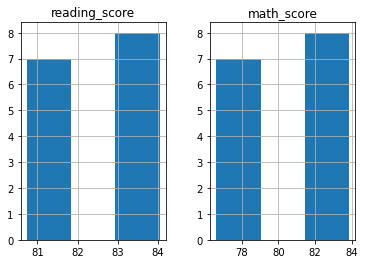

In [107]:
# Calculate averages for the desired columns. 
scor_budget.hist(bins = 3)

In [39]:
# Create the DataFrame
reading_bins = [0, 81, 82, 83, 84]
math_bins = [0, 78, 80, 82, 84]

In [40]:
# Format the DataFrame 


## Scores by School Size

In [108]:
# Establish the bins.
scor_size = school_data_complete_df.groupby(["size"]).mean()
scor_size = scor_size.drop(columns = ["Student ID", "School ID", "budget"])
# Categorize spending based on the bins.
scor_size.head(20)

,reading_score,math_score
size,,
427,83.814988,83.803279
962,84.044699,83.839917
1468,83.816757,83.351499
1635,83.848930,83.418349
1761,83.725724,83.359455
1800,83.955000,83.682222
1858,83.975780,83.061895
2283,83.989488,83.274201
2739,80.746258,77.102592


array([[<AxesSubplot:title={'center':'reading_score'}>,
        <AxesSubplot:title={'center':'math_score'}>]], dtype=object)

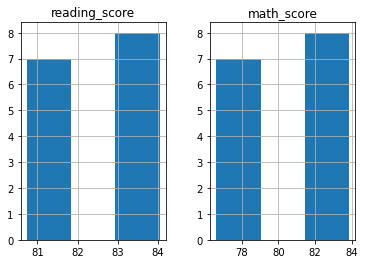

In [110]:
# Calculate averages for the desired columns. 
scor_size.hist(bins = 3)

In [43]:
# Assemble into DataFrame. 


In [44]:
# Format the DataFrame  


## Scores by School Type

In [102]:
# Calculate averages for the desired columns. 
sc_average = school_data_complete_df.groupby(["school_name"]).mean()
sc_average.head()

,Student ID,reading_score,math_score,School ID,size,budget
school_name,,,,,,
Bailey High School,20358.5,81.033963,77.048432,7.0,4976.0,3124928.0
Cabrera High School,16941.5,83.975780,83.061895,6.0,1858.0,1081356.0
Figueroa High School,4391.0,81.158020,76.711767,1.0,2949.0,1884411.0
Ford High School,36165.0,80.746258,77.102592,13.0,2739.0,1763916.0
Griffin High School,12995.5,83.816757,83.351499,4.0,1468.0,917500.0


In [58]:
# Assemble into DataFrame. 
SbS = sc_average.drop(columns = ["Student ID", "School ID", "size", "budget"])

In [73]:
# # Format the DataFrame 
SbS = SbS.rename(columns = {"reading_score" : "Reading Average", "math_score" : "Math Average"})
SbS.head()

,Reading Average,Math Average
school_name,,
Bailey High School,81.033963,77.048432
Cabrera High School,83.975780,83.061895
Figueroa High School,81.158020,76.711767
Ford High School,80.746258,77.102592
Griffin High School,83.816757,83.351499
